# 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np

# To suppress warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('Train.csv')

# ---------------------------
# 1. 결측치 처리
# ---------------------------
columns_to_fill = ['Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History']
df[columns_to_fill] = df[columns_to_fill].fillna('None')

# Education Level의 결측치를 'Unknown'으로 대체
df['Education Level'].fillna('Unknown', inplace=True)

# ---------------------------
# 2. Blood Pressure (s/d) 분리
# ---------------------------
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood Pressure (s/d)'], inplace=True)

# ---------------------------
# 3. 원-핫 인코딩: Gender, Chronic Diseases, Family History
# ---------------------------
df = pd.get_dummies(df, columns=['Gender', 'Chronic Diseases', 'Family History'], drop_first=True)

# ---------------------------
# 4. 사용자 정의 매핑을 적용한 레이블 인코딩
# ---------------------------

# 매핑 딕셔너리 정의
mapping_dict = {
    'Physical Activity Level': {'High': 0, 'Moderate': 1, 'Low': 2},
    'Smoking Status': {'Never': 0, 'Current': 1, 'Former': 2},
    'Alcohol Consumption': {'None': 0, 'Occasional': 1, 'Frequent': 2},
    'Diet': {'Balanced': 1, 'High-fat': 2, 'Low-carb': 3},
    'Medication Use': {'None': 0, 'Occasional': 1, 'Regular': 2},
    'Mental Health Status': {'Good': 3, 'Fair': 1, 'Poor': 2},
    'Sleep Patterns': {'Regular': 2, 'Irregular': 1, 'None': 0},
    'Education Level': {'Unknown': 0, 'High School': 1, 'Undergraduate': 2, 'Postgraduate': 3},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2}
}

# 매핑 적용 함수
def apply_mapping(df, mapping_dict):
    for col, mapping in mapping_dict.items():
        df[col] = df[col].map(mapping)
    return df

# 매핑 적용
df = apply_mapping(df, mapping_dict)

# ---------------------------
# 5. 결과 확인
# ---------------------------
print(df.head())

   ID  Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)        BMI  \
0   1   171.148359    86.185197                 259.465814  29.423017   
1   2   172.946206    79.641937                 263.630292  26.626847   
2   3   155.945488    49.167058                 207.846206  20.217553   
3   4   169.078298    56.017921                 253.283779  19.595270   
4   5   163.758355    73.966304                 236.119899  27.582078   

   Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  \
0                   157.652848              0.132868          0.200000   
1                   118.507805              0.629534          0.267312   
2                   143.587550              0.473487          0.248667   
3                   137.448581              1.184315          0.513818   
4                   145.328695              0.434562          0.306864   

   Hearing Ability (dB)  Physical Activity Level  ...  Age (years)  \
0             58.786198                       

# 메인 코드


Variance Inflation Factor (VIF) 결과:
                           Feature         VIF
0                      Height (cm)   40.649019
1                      Weight (kg)  102.184825
2        Cholesterol Level (mg/dL)    1.224004
3                              BMI   91.011249
4      Blood Glucose Level (mg/dL)    1.216716
5             Bone Density (g/cm²)    4.505035
6                 Vision Sharpness    3.919815
7             Hearing Ability (dB)    1.913272
8          Physical Activity Level    1.017974
9                   Smoking Status    1.030019
10             Alcohol Consumption    1.007118
11                  Medication Use    2.047110
12              Cognitive Function    1.339784
13            Mental Health Status    1.007698
14                  Sleep Patterns    1.008064
15                   Stress Levels    1.011682
16              Pollution Exposure    1.007196
17                    Sun Exposure    1.005880
18                 Education Level    1.013437
19                    I

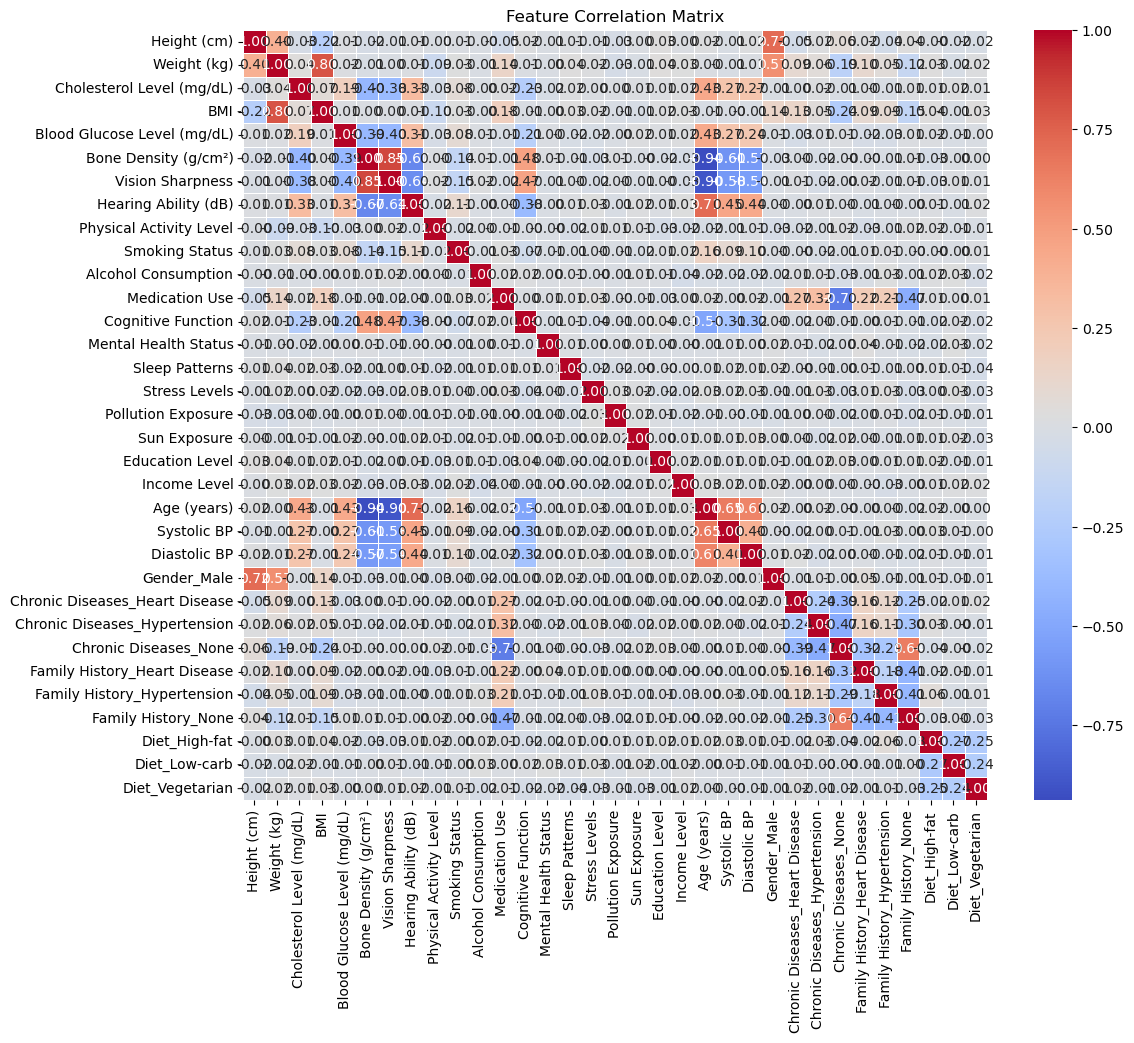

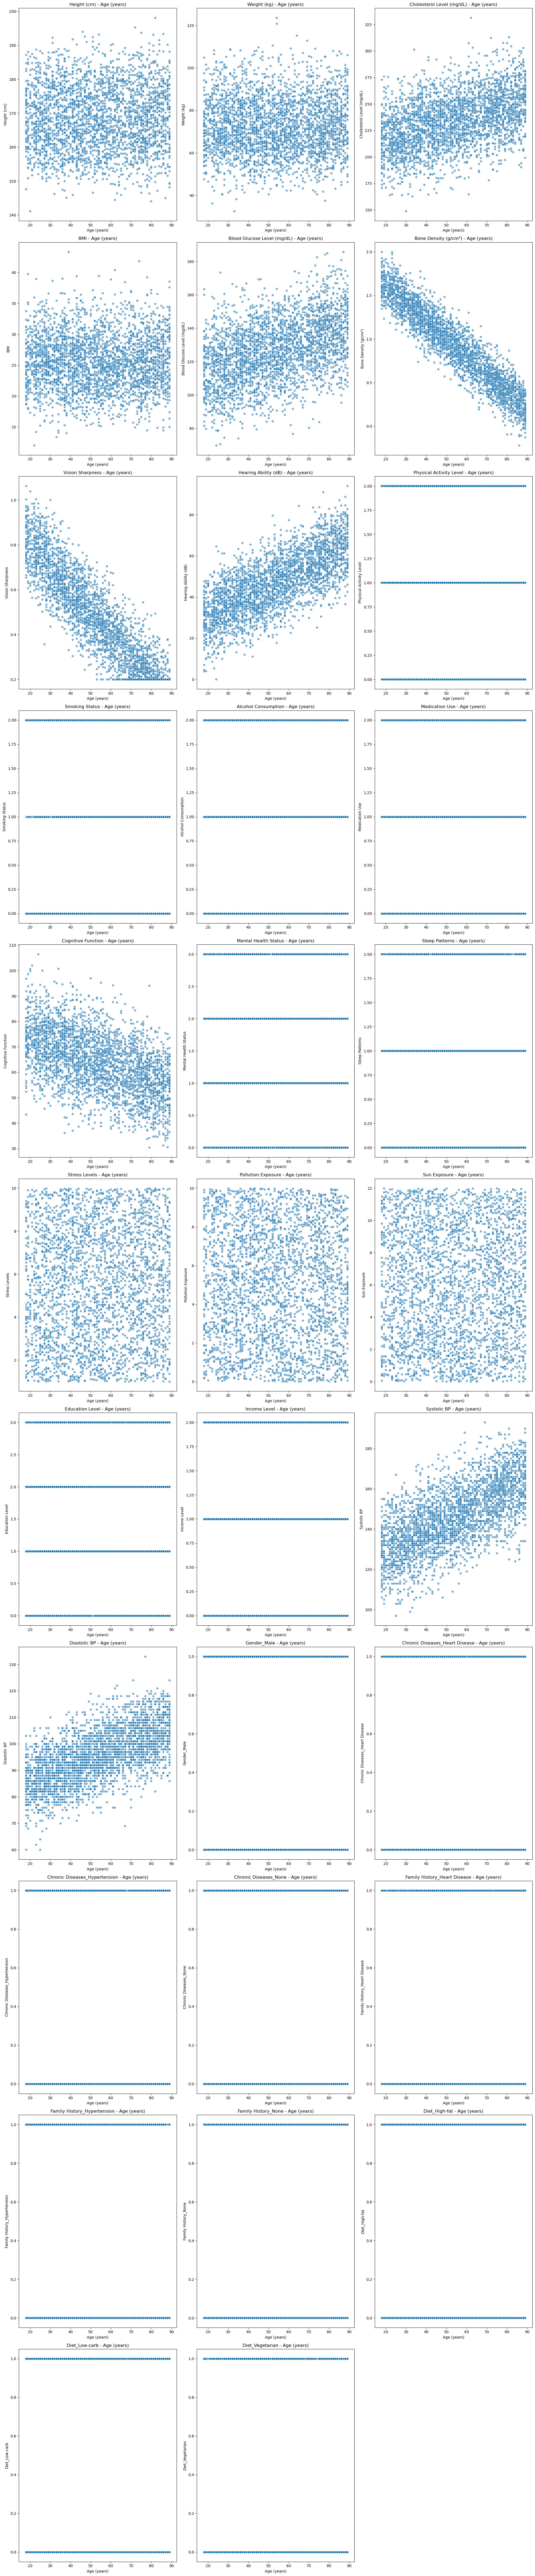

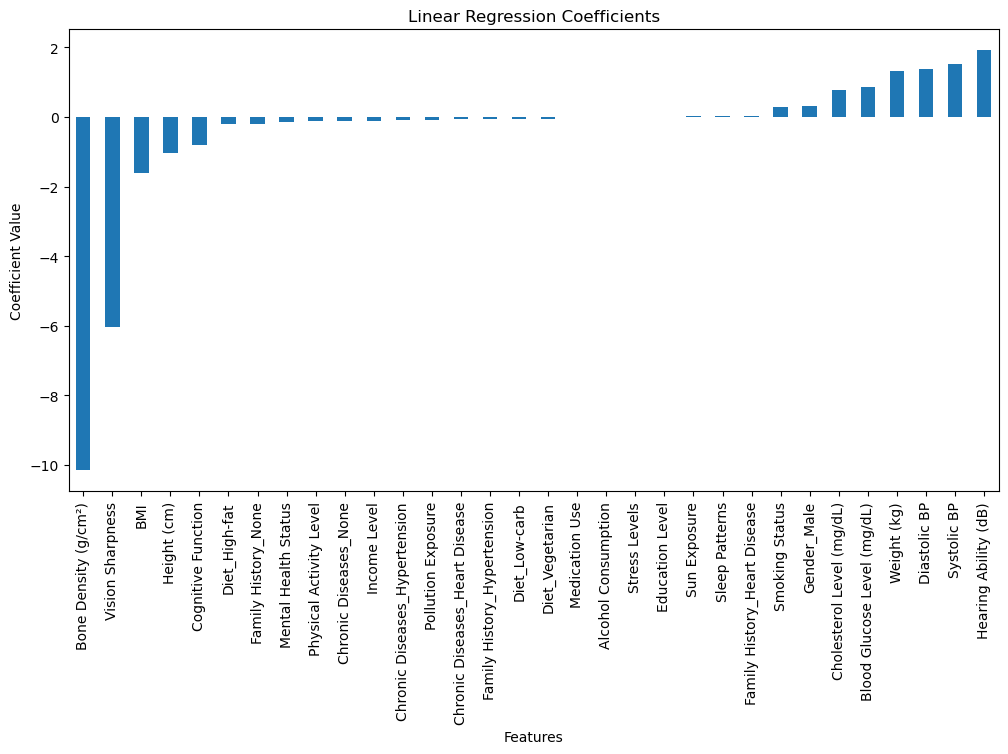


선형 회귀 평균 R²: 0.94
선형 회귀 평균 RMSE: 5.23

XGBoost 평균 R²: 0.92
XGBoost 평균 RMSE: 5.72
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

신경망 평균 R²: 0.90
신경망 평균 RMSE: 6.49


In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To suppress warnings
warnings.filterwarnings('ignore')

# ---------------------------
# 데이터 불러오기
# ---------------------------
train_path = 'Train.csv'
train_df = pd.read_csv(train_path)

# ---------------------------
# 결측치 처리
# ---------------------------
columns_to_fill = ['Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History']
train_df[columns_to_fill] = train_df[columns_to_fill].fillna('None')
train_df['Education Level'].fillna('Unknown', inplace=True)

# ---------------------------
# Blood Pressure (s/d) 분리
# ---------------------------
train_df[['Systolic BP', 'Diastolic BP']] = train_df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
train_df.drop(columns=['Blood Pressure (s/d)'], inplace=True)

# ---------------------------
# 원-핫 인코딩: Gender, Chronic Diseases, Family History, Diet
# ---------------------------
train_df = pd.get_dummies(train_df, columns=['Gender', 'Chronic Diseases', 'Family History', 'Diet'], drop_first=True)

# ---------------------------
# 사용자 정의 매핑을 적용한 레이블 인코딩 (Diet 제외)
# ---------------------------
mapping_dict = {
    'Physical Activity Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Smoking Status': {'Never': 0, 'Current': 1, 'Former': 2},
    'Alcohol Consumption': {'None': 0, 'Occasional': 1, 'Frequent': 2},
    'Medication Use': {'None': 0, 'Occasional': 1, 'Regular': 2},
    'Mental Health Status': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'Sleep Patterns': {'Insomnia': 0, 'Normal': 1, 'Excessive': 2},
    'Education Level': {'Unknown': 0, 'High School': 1, 'Undergraduate': 2, 'Postgraduate': 3},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2}
}

def apply_mapping(df, mapping_dict):
    for col, mapping in mapping_dict.items():
        df[col] = df[col].map(mapping)
    return df

train_df = apply_mapping(train_df, mapping_dict)

# ---------------------------
# Train 데이터에서 특성과 타겟 설정
# ---------------------------
X = train_df.drop(columns=['ID', 'Age (years)'])
y = train_df['Age (years)']

# ---------------------------
# 데이터 정규화
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# VIF (Variance Inflation Factor) 계산
# ---------------------------
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("\nVariance Inflation Factor (VIF) 결과:")
print(vif)

# ---------------------------
# 상관관계 행렬 시각화
# ---------------------------
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.drop(columns=['ID']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# ---------------------------
# 산포도 시각화: X에 대한 Y(Age) 산포도
# ---------------------------
target = 'Age (years)'

# X에 있는 모든 특성 선택
numerical_features = X.columns

# 산포도 그리기
plt.figure(figsize=(20, len(numerical_features) * 3))  # 그래프 크기 조정
for i, feature in enumerate(numerical_features):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i + 1)  # 3열로 배치
    sns.scatterplot(y=train_df[feature], x=train_df[target], alpha=0.6)
    plt.ylabel(feature)
    plt.xlabel(target)
    plt.title(f"{feature} - {target}")

plt.tight_layout()
plt.show()

# ---------------------------
# K-Fold 교차 검증 설정
# ---------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------
# 선형 회귀 모델 학습 및 K-Fold 교차 검증
# ---------------------------
lr_model = LinearRegression()
lr_r2_scores = []
lr_rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    lr_r2_scores.append(r2)
    lr_rmse_scores.append(rmse)

# 회귀 계수 확인
coefficients = pd.Series(lr_model.coef_, index=X.columns)

plt.figure(figsize=(12, 6))
coefficients.sort_values().plot(kind='bar')
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

print(f"\n선형 회귀 평균 R²: {np.mean(lr_r2_scores):.2f}")
print(f"선형 회귀 평균 RMSE: {np.mean(lr_rmse_scores):.2f}")

# ---------------------------
# XGBoost 모델 학습 및 K-Fold 교차 검증
# ---------------------------
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
xgb_r2_scores = []
xgb_rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    xgb_r2_scores.append(r2)
    xgb_rmse_scores.append(rmse)

print(f"\nXGBoost 평균 R²: {np.mean(xgb_r2_scores):.2f}")
print(f"XGBoost 평균 RMSE: {np.mean(xgb_rmse_scores):.2f}")

# ---------------------------
# 신경망 모델 학습 및 K-Fold 교차 검증
# ---------------------------
nn_r2_scores = []
nn_rmse_scores = []

def build_nn():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    nn_model = build_nn()
    nn_model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2)
    y_pred = nn_model.predict(X_val).flatten()
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    nn_r2_scores.append(r2)
    nn_rmse_scores.append(rmse)

print(f"\n신경망 평균 R²: {np.mean(nn_r2_scores):.2f}")
print(f"신경망 평균 RMSE: {np.mean(nn_rmse_scores):.2f}")


# VIF 처리


Variance Inflation Factor (VIF) 결과:
                           Feature       VIF
0        Cholesterol Level (mg/dL)  1.223521
1                              BMI  1.117214
2      Blood Glucose Level (mg/dL)  1.215841
3             Bone Density (g/cm²)  4.504762
4                 Vision Sharpness  3.919696
5             Hearing Ability (dB)  1.912833
6          Physical Activity Level  1.017125
7                   Smoking Status  1.029303
8              Alcohol Consumption  1.006541
9                   Medication Use  2.047087
10              Cognitive Function  1.338990
11            Mental Health Status  1.006544
12                  Sleep Patterns  1.007855
13                   Stress Levels  1.011267
14              Pollution Exposure  1.004779
15                    Sun Exposure  1.005784
16                 Education Level  1.011120
17                    Income Level  1.008512
18                     Systolic BP  1.642230
19                    Diastolic BP  1.534198
20                

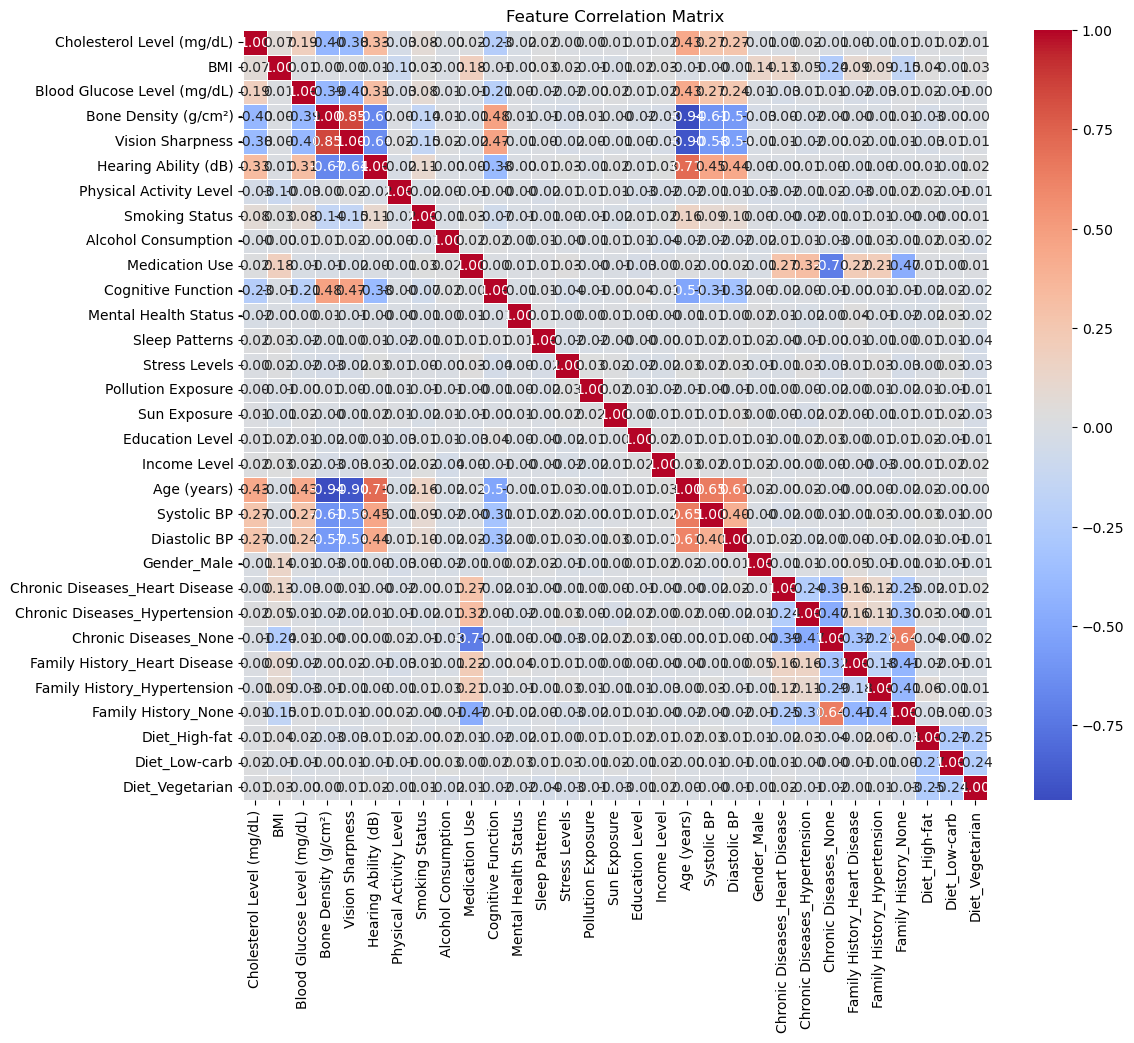

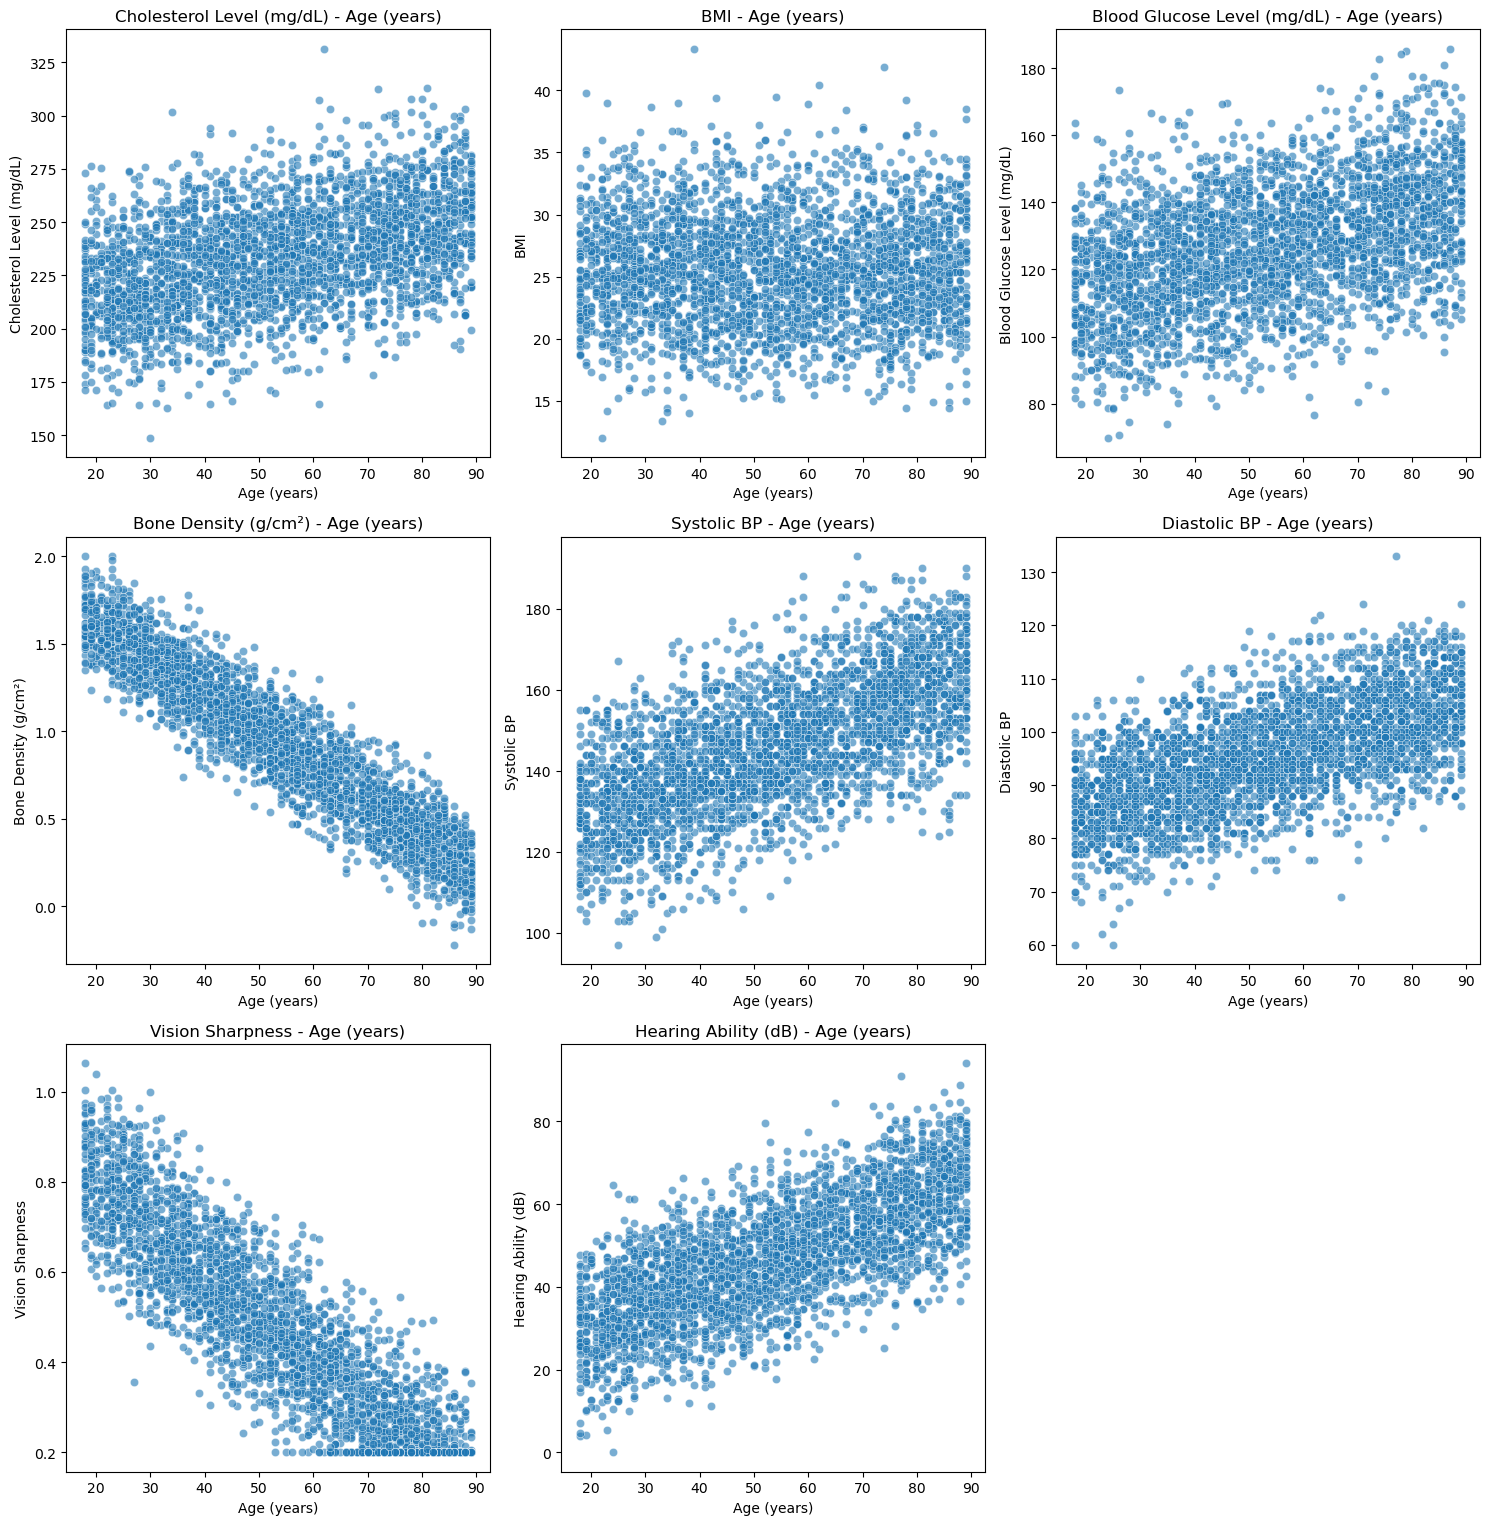

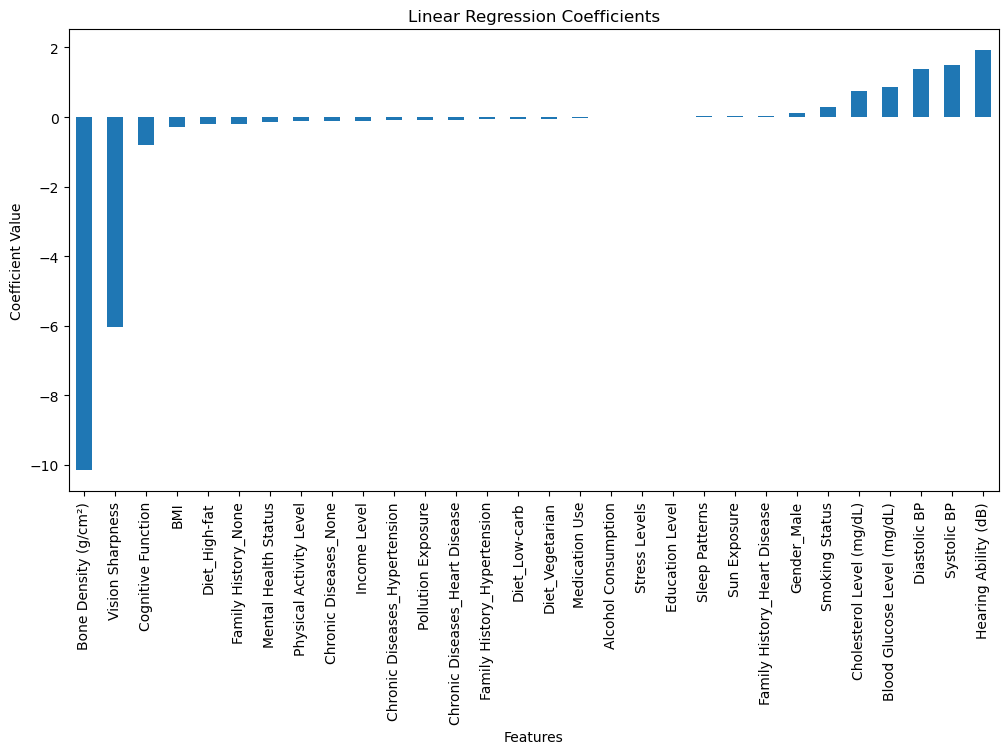


선형 회귀 평균 R²: 0.94
선형 회귀 평균 RMSE: 5.23


In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To suppress warnings
warnings.filterwarnings('ignore')

# ---------------------------
# 데이터 불러오기
# ---------------------------
train_path = 'Train.csv'
train_df = pd.read_csv(train_path)

# ---------------------------
# 결측치 처리
# ---------------------------
columns_to_fill = ['Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History']
train_df[columns_to_fill] = train_df[columns_to_fill].fillna('None')
train_df['Education Level'].fillna('Unknown', inplace=True)

# ---------------------------
# Blood Pressure (s/d) 분리
# ---------------------------
train_df[['Systolic BP', 'Diastolic BP']] = train_df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
train_df.drop(columns=['Blood Pressure (s/d)'], inplace=True)

# ---------------------------
# 원-핫 인코딩: Gender, Chronic Diseases, Family History, Diet
# ---------------------------
train_df = pd.get_dummies(train_df, columns=['Gender', 'Chronic Diseases', 'Family History', 'Diet'], drop_first=True)

# ---------------------------
# 사용자 정의 매핑을 적용한 레이블 인코딩 (Diet 제외)
# ---------------------------
mapping_dict = {
    'Physical Activity Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Smoking Status': {'Never': 0, 'Current': 1, 'Former': 2},
    'Alcohol Consumption': {'None': 0, 'Occasional': 1, 'Frequent': 2},
    'Medication Use': {'None': 0, 'Occasional': 1, 'Regular': 2},
    'Mental Health Status': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'Sleep Patterns': {'Insomnia': 0, 'Normal': 1, 'Excessive': 2},
    'Education Level': {'Unknown': 0, 'High School': 1, 'Undergraduate': 2, 'Postgraduate': 3},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2}
}

def apply_mapping(df, mapping_dict):
    for col, mapping in mapping_dict.items():
        df[col] = df[col].map(mapping)
    return df

train_df = apply_mapping(train_df, mapping_dict)

# ---------------------------
# 중복 특성 제거: Height (cm)와 Weight (kg) 제거
# ---------------------------
train_df.drop(columns=['Height (cm)', 'Weight (kg)'], inplace=True)

# ---------------------------
# Train 데이터에서 특성과 타겟 설정
# ---------------------------
X = train_df.drop(columns=['ID', 'Age (years)'])
y = train_df['Age (years)']

# ---------------------------
# 데이터 정규화
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# VIF (Variance Inflation Factor) 계산
# ---------------------------
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("\nVariance Inflation Factor (VIF) 결과:")
print(vif)

# ---------------------------
# 상관관계 행렬 시각화
# ---------------------------
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.drop(columns=['ID']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# ---------------------------
# 산포도 시각화: X에 대한 Y(Age) 산포도
# ---------------------------
target = 'Age (years)'

# 주요 수치형 특성 선택
numerical_features = ['Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)', 
                      'Bone Density (g/cm²)', 'Systolic BP', 'Diastolic BP',
                      'Vision Sharpness', 'Hearing Ability (dB)']

# 산포도 그리기
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(y=train_df[feature], x=train_df[target], alpha=0.6)
    plt.ylabel(feature)
    plt.xlabel(target)
    plt.title(f"{feature} - {target}")

plt.tight_layout()
plt.show()

# ---------------------------
# K-Fold 교차 검증 설정
# ---------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------
# 선형 회귀 모델 학습 및 K-Fold 교차 검증
# ---------------------------
lr_model = LinearRegression()
lr_r2_scores = []
lr_rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    lr_r2_scores.append(r2)
    lr_rmse_scores.append(rmse)

# 회귀 계수 확인
coefficients = pd.Series(lr_model.coef_, index=X.columns)

plt.figure(figsize=(12, 6))
coefficients.sort_values().plot(kind='bar')
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

print(f"\n선형 회귀 평균 R²: {np.mean(lr_r2_scores):.2f}")
print(f"선형 회귀 평균 RMSE: {np.mean(lr_rmse_scores):.2f}")


# 전진선택법, 후진선택법, 단계적선택법

In [6]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

# To suppress warnings
warnings.filterwarnings('ignore')

# ---------------------------
# 데이터 불러오기
# ---------------------------
train_path = 'Train.csv'
train_df = pd.read_csv(train_path)

# ---------------------------
# 결측치 처리
# ---------------------------
columns_to_fill = ['Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History']
train_df[columns_to_fill] = train_df[columns_to_fill].fillna('None')
train_df['Education Level'].fillna('Unknown', inplace=True)

# ---------------------------
# Blood Pressure (s/d) 분리
# ---------------------------
train_df[['Systolic BP', 'Diastolic BP']] = train_df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
train_df.drop(columns=['Blood Pressure (s/d)'], inplace=True)

# ---------------------------
# 원-핫 인코딩: Gender, Chronic Diseases, Family History, Diet
# ---------------------------
train_df = pd.get_dummies(train_df, columns=['Gender', 'Chronic Diseases', 'Family History', 'Diet'], drop_first=True)

# ---------------------------
# 사용자 정의 매핑을 적용한 레이블 인코딩 (Diet 제외)
# ---------------------------
mapping_dict = {
    'Physical Activity Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Smoking Status': {'Never': 0, 'Current': 1, 'Former': 2},
    'Alcohol Consumption': {'None': 0, 'Occasional': 1, 'Frequent': 2},
    'Medication Use': {'None': 0, 'Occasional': 1, 'Regular': 2},
    'Mental Health Status': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'Sleep Patterns': {'Insomnia': 0, 'Normal': 1, 'Excessive': 2},
    'Education Level': {'Unknown': 0, 'High School': 1, 'Undergraduate': 2, 'Postgraduate': 3},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2}
}

def apply_mapping(df, mapping_dict):
    for col, mapping in mapping_dict.items():
        df[col] = df[col].map(mapping)
    return df

train_df = apply_mapping(train_df, mapping_dict)

# ---------------------------
# Train 데이터에서 특성과 타겟 설정
# ---------------------------
X = train_df.drop(columns=['ID', 'Age (years)'])
y = train_df['Age (years)']

# ---------------------------
# 데이터 정규화
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 모델 성능 평가 함수
# ---------------------------
def evaluate_model(X_selected, y, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_scores = []
    rmse_scores = []
    
    for train_index, val_index in kf.split(X_selected):
        X_train, X_val = X_selected[train_index], X_selected[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        
        r2_scores.append(r2)
        rmse_scores.append(rmse)
    
    print(f"평균 R²: {np.mean(r2_scores):.2f}")
    print(f"평균 RMSE: {np.mean(rmse_scores):.2f}")

# ---------------------------
# 전진 선택법
# ---------------------------
model = LinearRegression()
forward_selector = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto', cv=5)
forward_selector.fit(X_scaled, y)
forward_selected_features = X.columns[forward_selector.get_support()]
print("\n전진 선택법으로 선택된 특성:", forward_selected_features)

print("\n전진 선택법 성능:")
evaluate_model(X_scaled[:, forward_selector.get_support()], y, model)

# ---------------------------
# 후진 선택법
# ---------------------------
backward_selector = SequentialFeatureSelector(model, direction='backward', n_features_to_select='auto', cv=5)
backward_selector.fit(X_scaled, y)
backward_selected_features = X.columns[backward_selector.get_support()]
print("\n후진 선택법으로 선택된 특성:", backward_selected_features)

print("\n후진 선택법 성능:")
evaluate_model(X_scaled[:, backward_selector.get_support()], y, model)

# ---------------------------
# 단계적 선택법
# ---------------------------
def stepwise_selection(X, y, initial_features=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_features)
    while True:
        changed = False

        # Forward Step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6f}')

        # Backward Step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f'Remove {worst_feature:30} with p-value {worst_pval:.6f}')

        if not changed:
            break

    return included

# 단계적 선택법 실행
selected_features = stepwise_selection(pd.DataFrame(X_scaled, columns=X.columns), y)
print("\n단계적 선택법으로 선택된 특성:", selected_features)

print("\n단계적 선택법 성능:")
evaluate_model(X_scaled[:, [X.columns.get_loc(f) for f in selected_features]], y, model)



전진 선택법으로 선택된 특성: Index(['Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)',
       'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Cognitive Function', 'Systolic BP', 'Diastolic BP', 'Gender_Male',
       'Chronic Diseases_None', 'Family History_Hypertension',
       'Diet_High-fat'],
      dtype='object')

전진 선택법 성능:
평균 R²: 0.94
평균 RMSE: 5.21

후진 선택법으로 선택된 특성: Index(['Height (cm)', 'Weight (kg)', 'Cholesterol Level (mg/dL)', 'BMI',
       'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)',
       'Vision Sharpness', 'Hearing Ability (dB)', 'Smoking Status',
       'Cognitive Function', 'Systolic BP', 'Diastolic BP', 'Gender_Male',
       'Chronic Diseases_None', 'Family History_Hypertension',
       'Diet_High-fat'],
      dtype='object')

후진 선택법 성능:
평균 R²: 0.94
평균 RMSE: 5.21
Add  Hearing Ability (dB)           with p-value 0.000000
Add  Bone Density (g/cm²)       

# Lasso, Ridge


Lasso 회귀 성능:
평균 R²: 0.94
평균 RMSE: 5.22


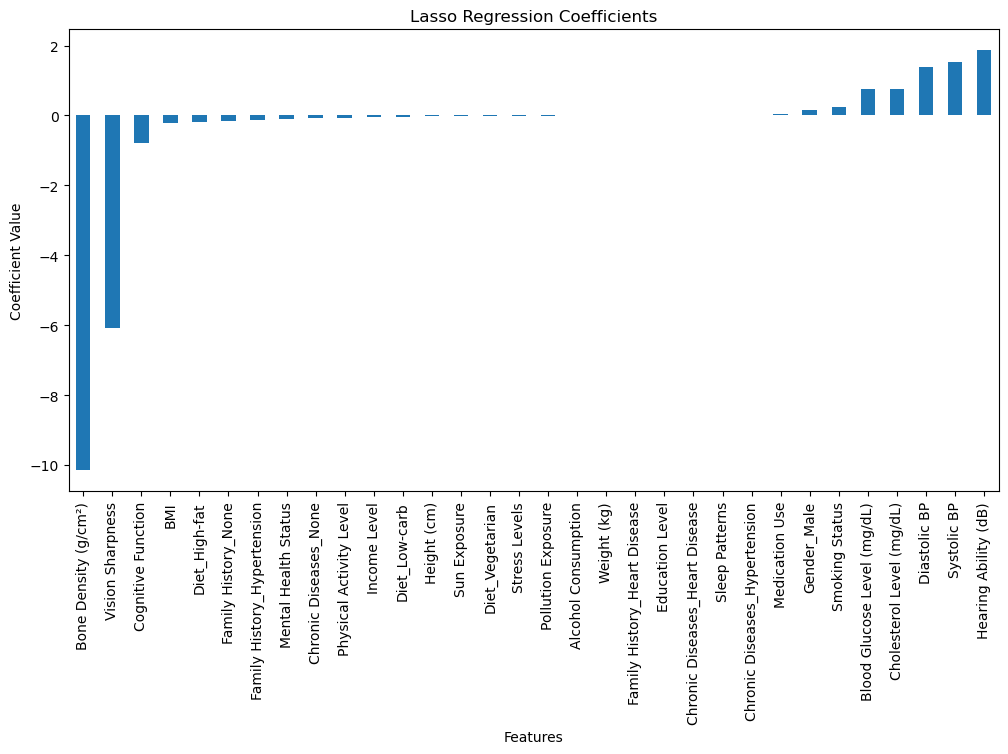


Ridge 회귀 성능:
평균 R²: 0.94
평균 RMSE: 5.23


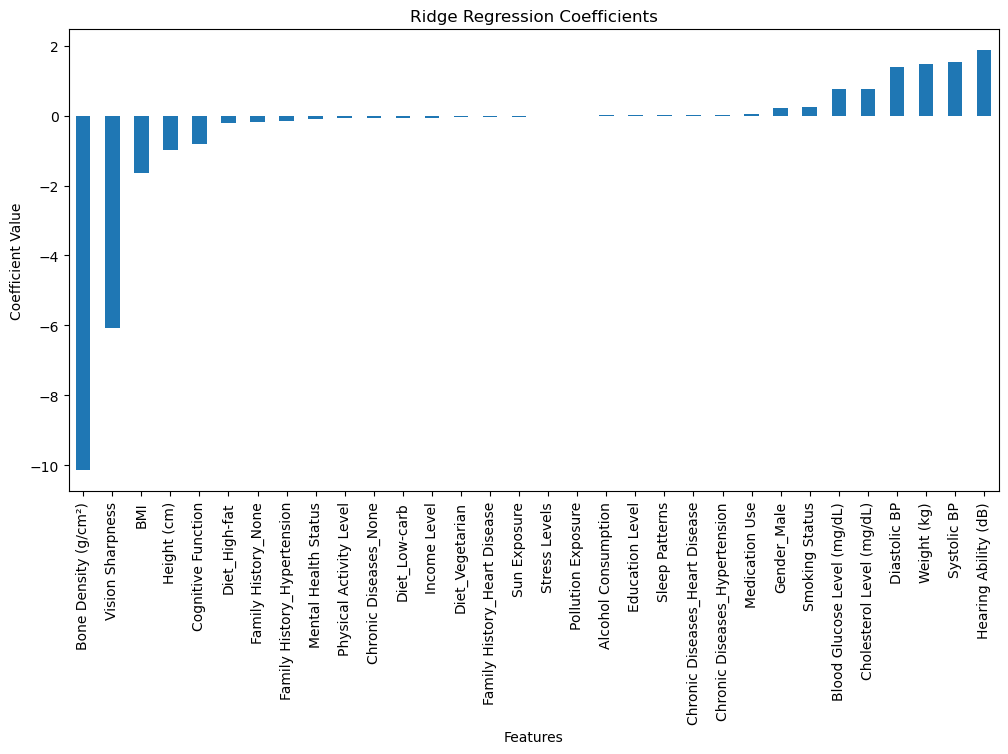

In [7]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

# To suppress warnings
warnings.filterwarnings('ignore')

# ---------------------------
# 데이터 불러오기
# ---------------------------
train_path = 'Train.csv'
train_df = pd.read_csv(train_path)

# ---------------------------
# 결측치 처리
# ---------------------------
columns_to_fill = ['Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History']
train_df[columns_to_fill] = train_df[columns_to_fill].fillna('None')
train_df['Education Level'].fillna('Unknown', inplace=True)

# ---------------------------
# Blood Pressure (s/d) 분리
# ---------------------------
train_df[['Systolic BP', 'Diastolic BP']] = train_df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
train_df.drop(columns=['Blood Pressure (s/d)'], inplace=True)

# ---------------------------
# 원-핫 인코딩: Gender, Chronic Diseases, Family History, Diet
# ---------------------------
train_df = pd.get_dummies(train_df, columns=['Gender', 'Chronic Diseases', 'Family History', 'Diet'], drop_first=True)

# ---------------------------
# 사용자 정의 매핑을 적용한 레이블 인코딩 (Diet 제외)
# ---------------------------
mapping_dict = {
    'Physical Activity Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Smoking Status': {'Never': 0, 'Current': 1, 'Former': 2},
    'Alcohol Consumption': {'None': 0, 'Occasional': 1, 'Frequent': 2},
    'Medication Use': {'None': 0, 'Occasional': 1, 'Regular': 2},
    'Mental Health Status': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'Sleep Patterns': {'Insomnia': 0, 'Normal': 1, 'Excessive': 2},
    'Education Level': {'Unknown': 0, 'High School': 1, 'Undergraduate': 2, 'Postgraduate': 3},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2}
}

def apply_mapping(df, mapping_dict):
    for col, mapping in mapping_dict.items():
        df[col] = df[col].map(mapping)
    return df

train_df = apply_mapping(train_df, mapping_dict)

# ---------------------------
# Train 데이터에서 특성과 타겟 설정
# ---------------------------
X = train_df.drop(columns=['ID', 'Age (years)'])
y = train_df['Age (years)']

# ---------------------------
# 데이터 정규화
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 모델 성능 평가 함수
# ---------------------------
def evaluate_model(X_selected, y, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_scores = []
    rmse_scores = []
    
    for train_index, val_index in kf.split(X_selected):
        X_train, X_val = X_selected[train_index], X_selected[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        
        r2_scores.append(r2)
        rmse_scores.append(rmse)
    
    print(f"평균 R²: {np.mean(r2_scores):.2f}")
    print(f"평균 RMSE: {np.mean(rmse_scores):.2f}")

# ---------------------------
# Lasso 회귀 적용
# ---------------------------
lasso_model = Lasso(alpha=0.01)
print("\nLasso 회귀 성능:")
evaluate_model(X_scaled, y, lasso_model)

# Lasso 회귀 계수 확인
lasso_coefficients = pd.Series(lasso_model.fit(X_scaled, y).coef_, index=X.columns)

plt.figure(figsize=(12, 6))
lasso_coefficients.sort_values().plot(kind='bar')
plt.title("Lasso Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# ---------------------------
# Ridge 회귀 적용
# ---------------------------
ridge_model = Ridge(alpha=0.01)
print("\nRidge 회귀 성능:")
evaluate_model(X_scaled, y, ridge_model)

# Ridge 회귀 계수 확인
ridge_coefficients = pd.Series(ridge_model.fit(X_scaled, y).coef_, index=X.columns)

plt.figure(figsize=(12, 6))
ridge_coefficients.sort_values().plot(kind='bar')
plt.title("Ridge Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()
